<a href="https://colab.research.google.com/github/VUGUSTIE/Machine-Learning/blob/main/BloodChain_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#install lib to visualize
!pip install seaborn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/BloodChain

/content/drive/MyDrive/BloodChain


In [ ]:
ls

Anemia.gsheet


In [ ]:
 train_df = pd.read_csv("anemia.csv")


<Axes: >

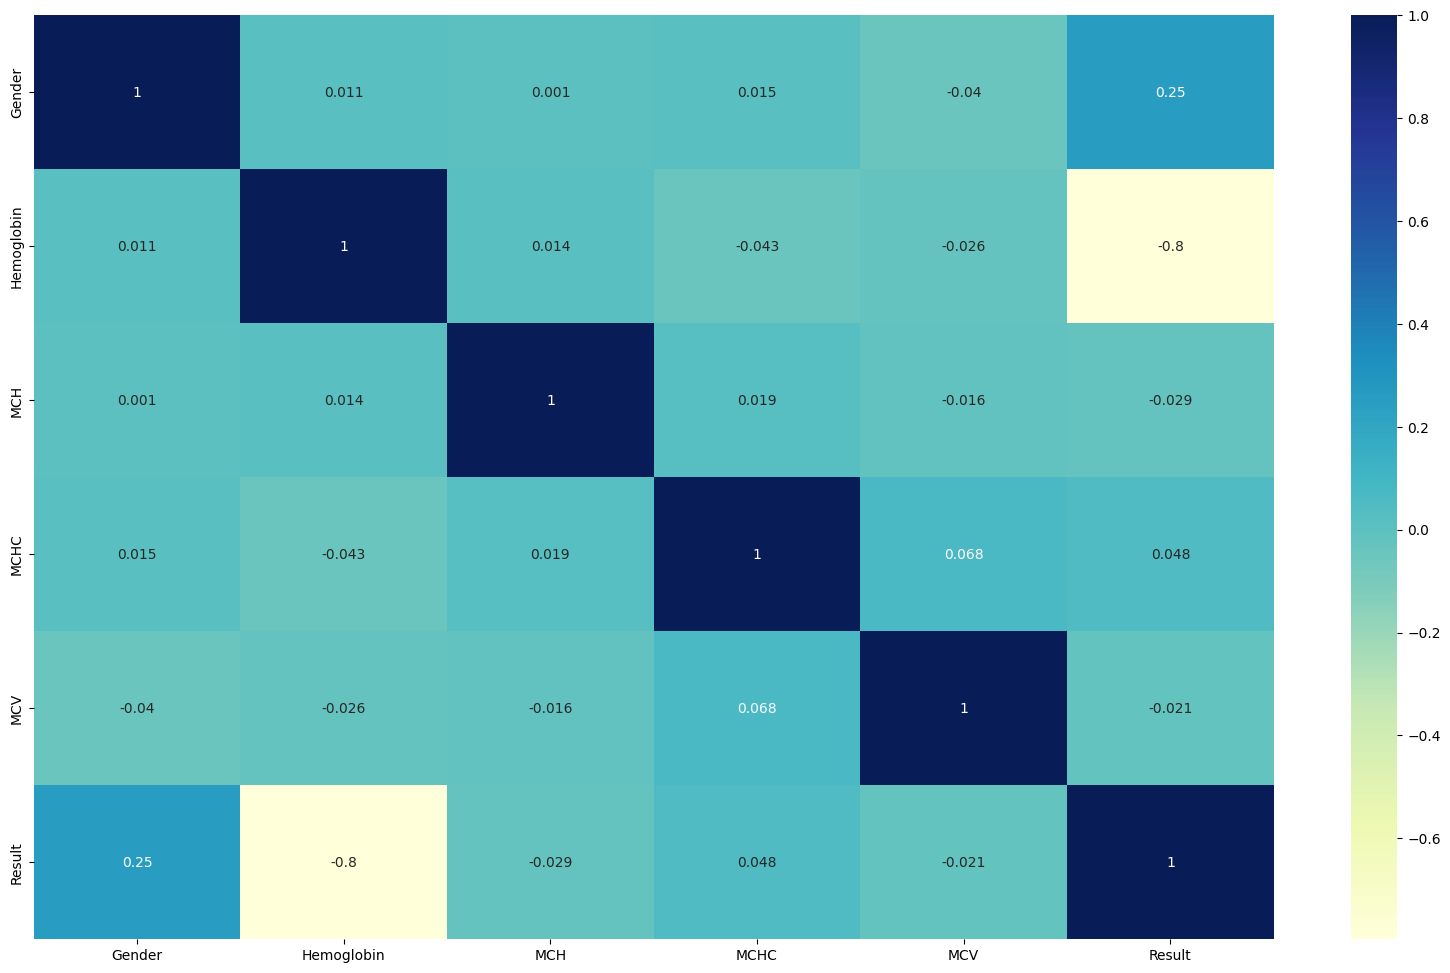

In [ ]:
plt.figure(figsize=(20, 12))
sns.heatmap(train_df.corr(), annot=True, cmap='YlGnBu')

In [ ]:
x = train_df.drop('Result', axis =1)

In [ ]:
y = train_df['Result']
y

0       0
1       0
2       1
3       0
4       0
       ..
1416    1
1417    1
1418    1
1419    0
1420    1
Name: Result, Length: 1421, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 42)
x_train


,Gender,Hemoglobin,MCH,MCHC,MCV
432,0,12.7,23.3,30.3,92.8
411,1,10.4,18.9,27.8,75.1
843,1,15.0,20.8,32.3,88.7
471,0,15.6,28.8,30.8,86.4
861,1,10.5,23.0,30.4,100.1
...,...,...,...,...,...
1095,0,12.5,29.7,30.6,90.5
1130,0,13.0,28.3,30.0,83.0
1294,0,13.4,25.3,28.6,83.8
860,0,10.8,19.7,29.5,93.0


In [ ]:
y_train

432     0
411     1
843     0
471     0
861     1
       ..
1095    0
1130    0
1294    0
860     1
1126    0
Name: Result, Length: 1136, dtype: int64

In [ ]:
!pip install scikit-learn

In [ ]:
clf = LogisticRegression()

In [ ]:
clf.fit(x_train, y_train)

LogisticRegression()

In [ ]:
if clf is None:
    raise Exception("Failed to fit the LogisticRegression model.")

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
print(y_pred)

[1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 0 1
 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0
 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 1 1 1
 1 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1
 1 1 0 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0
 1 0 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 1 0 1
 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1]


In [ ]:
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print("Accuracy:", accuracy)

Accuracy: 0.9894736842105263


In [ ]:
print(f"traininng accuracy {clf.score(x_train, y_train)}")

traininng accuracy 0.9920774647887324


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
x_cv =   x_test                      # Define x_cv using your preferred method
y_cv = y_test # Define y_cv using your preferred method

In [ ]:
scores = cross_val_score(clf, x_cv, y_cv, cv=10, scoring='accuracy')
print(f"validation accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")

validation accuracy: 0.9719 (+/- 0.0462)


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_pred = clf.predict(x_cv)
print(classification_report(y_cv, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       157
           1       0.98      1.00      0.99       128

    accuracy                           0.99       285
   macro avg       0.99      0.99      0.99       285
weighted avg       0.99      0.99      0.99       285

